In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [33]:
gold_data = pd.read_csv(r'D:\Notepad\gld_price_data.csv')

In [34]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [35]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [36]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [37]:
gold_data.shape

(2290, 6)

In [38]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [39]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [40]:
Correlation:

Positive Correlation
Negative Correlation

SyntaxError: invalid syntax (<ipython-input-40-7ef3412b706e>, line 1)

In [41]:
correlation = gold_data.corr()

<AxesSubplot:>

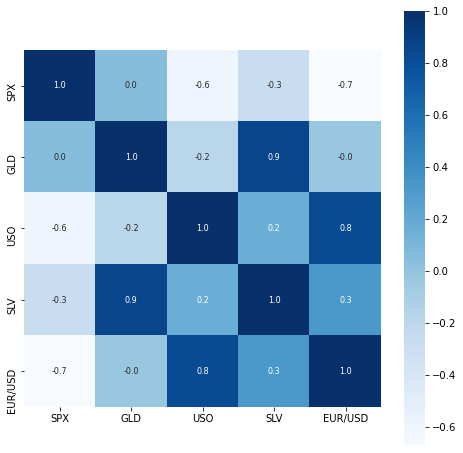

In [42]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [43]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

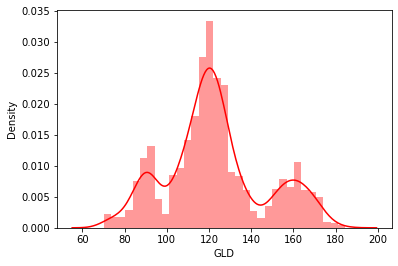

In [44]:
sns.distplot(gold_data['GLD'],color='r')

Splitting the Features and Target

In [45]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [46]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [47]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [49]:
regressor = RandomForestRegressor(n_estimators=100)

In [50]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [51]:
test_data_prediction = regressor.predict(X_test)

In [52]:
print(test_data_prediction)

[168.40559894  82.15469987 115.96399993 127.56030092 120.78770135
 154.72189744 149.823699   126.0818003  117.55209894 125.95910079
 116.81790112 171.35910095 141.69179874 167.52549779 115.16029972
 117.65910052 136.1370044  170.31610083 159.01330297 160.07369863
 155.02840003 125.60460006 176.1567997  157.59300342 125.18300045
  93.82439959  77.60239998 120.29319997 118.99709853 167.45789988
  87.91540063 125.0950003   91.09310081 117.8061999  121.19749868
 135.74880087 115.56370114 115.09770091 147.42149951 107.35260079
 104.19800243  87.08299791 126.2938006  118.08740025 153.7113988
 119.76250019 108.50759978 108.1615981   93.34530082 127.12619756
  75.27340046 113.69989923 121.57619995 111.12919924 118.7368989
 121.16409927 158.12210012 168.25470199 147.30259654  85.79989873
  94.36600059  86.74189897  90.58100018 119.07930077 126.45580083
 127.62479997 170.33499965 122.23519935 117.20609888  98.35490041
 168.53300172 143.16609914 132.2764027  121.16780226 120.7204993
 119.79840073

In [53]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9897290603329185


Compare the Actual Values and Predicted Values in a Plot

In [54]:
Y_test = list(Y_test)

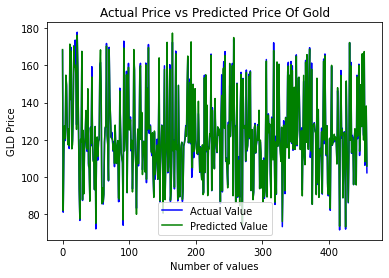

In [55]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price Of Gold')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()